In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

file = pd.read_csv("version10.csv")

file.head()

,Unnamed: 0,diagnosis,radius_worst_bins,concave_points_mean_bins,perimeter_worst_bins,concave points_worst_bins,radius_mean_bins,perimeter_mean_bins,area_worst_bins,area_mean_bins
0,0,M,High,High,High,High,High,High,High,High
1,1,M,High,Medium_High,High,High,High,High,High,High
2,2,M,High,High,High,High,High,High,High,High
3,3,M,Medium_Low,High,Medium_High,High,Low,Medium_Low,Medium_Low,Low
4,4,M,High,High,High,High,High,High,High,High


In [2]:
df = file.drop(columns=['Unnamed: 0'])

In [6]:
df.columns

Index(['diagnosis', 'radius_worst_bins', 'concave_points_mean_bins',
       'perimeter_worst_bins', 'concave points_worst_bins', 'radius_mean_bins',
       'perimeter_mean_bins', 'area_worst_bins', 'area_mean_bins'],
      dtype='object')

In [5]:
df2 = df.loc[:, ["diagnosis"]]
df2["diagnosis"] = [1 if x == "M" else 0 for x in df2.diagnosis]
df2.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [8]:
dums_linear = pd.get_dummies(df.loc[:, ['radius_worst_bins', 'concave_points_mean_bins',
       'perimeter_worst_bins', 'concave points_worst_bins', 'radius_mean_bins',
       'perimeter_mean_bins', 'area_worst_bins', 'area_mean_bins']], drop_first=True)
dums_linear.head()

,radius_worst_bins_Low,radius_worst_bins_Medium_High,radius_worst_bins_Medium_Low,concave_points_mean_bins_Low,concave_points_mean_bins_Medium_High,concave_points_mean_bins_Medium_Low,perimeter_worst_bins_Low,perimeter_worst_bins_Medium_High,perimeter_worst_bins_Medium_Low,concave points_worst_bins_Low,...,radius_mean_bins_Medium_Low,perimeter_mean_bins_Low,perimeter_mean_bins_Medium_High,perimeter_mean_bins_Medium_Low,area_worst_bins_Low,area_worst_bins_Medium_High,area_worst_bins_Medium_Low,area_mean_bins_Low,area_mean_bins_Medium_High,area_mean_bins_Medium_Low
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = dums_linear.values
y = df2.values

In [13]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7486818980667839
0.2513181019332162


In [17]:
# Initialize the model
model1 = LogisticRegression(random_state=23)

# FIT THE MODEL
model1.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       267
           1       0.97      0.85      0.91       159

    accuracy                           0.93       426
   macro avg       0.94      0.92      0.93       426
weighted avg       0.94      0.93      0.93       426

[[263   4]
 [ 24 135]]

Testing SET
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        90
           1       0.94      0.87      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

[[87  3]
 [ 7 46]]


C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


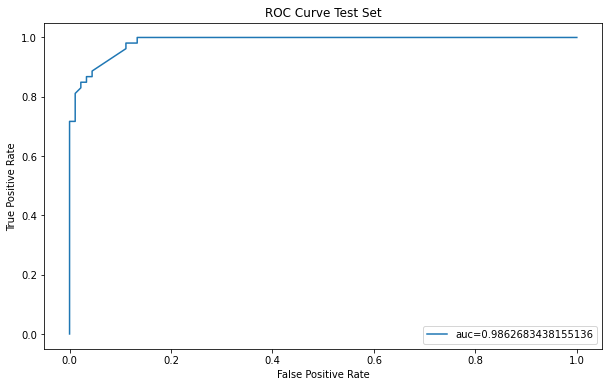

In [18]:
y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [19]:
import pickle

In [20]:
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))